In [1]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [2]:
# 1) Loading the dataset
transform = transforms.Compose([transforms.Resize(size=(28, 28)),
                               transforms.ToTensor(), 
                               transforms.Normalize((0.5, ), (0.5, ))
                               ])
training_dataset = datasets.MNIST(root='./data',
                                  train=True,
                                  download=True, 
                                  transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,
                                              batch_size=100,
                                              shuffle=True)
training_dataset

# training_loader.batch_size

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

(28, 28, 3)


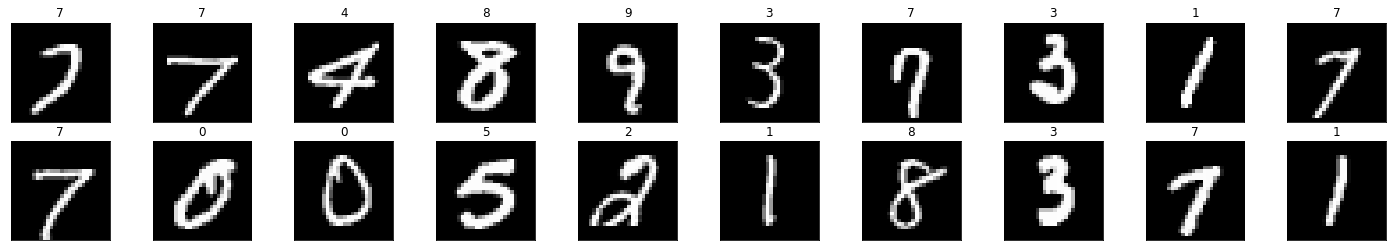

In [10]:
# 2) Checking the data format
data_iter = iter(training_loader)
images, labels = next(data_iter)

# print(images.shape)
# plt.imshow(images[0][0])

def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

print(im_convert(images[3]).shape)
fig = plt.figure(figsize=(25, 4))
for indx in np.arange(20):
    ax = fig.add_subplot(2, 10, indx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[indx]))
    ax.set_title(labels[indx].item())

In [4]:
# 3) Building the model 
class Classifier(nn.Module):
    
    def __init__(self, input_size, H1, H2, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, output_size)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [25]:
# 4) Train the model 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 3
running_loss_history = []
running_corrects_history = []

for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    for inputs, labels in training_loader: 
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        
    else:
        epoch_loss = running_loss / len(training_loader)
        epoch_acc = running_corrects.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(epoch_acc)
        print('training loss: {:.4f}, acc: {:.4f}'.format(epoch_loss,
                                                        epoch_acc.item()))

training loss: 0.4205, acc87.0133
training loss: 0.2307, acc93.0617
training loss: 0.2061, acc93.8150


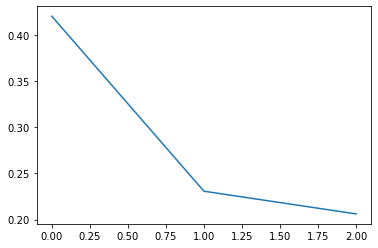

In [26]:
# 5) showing the plots
plt.plot(running_loss_history)

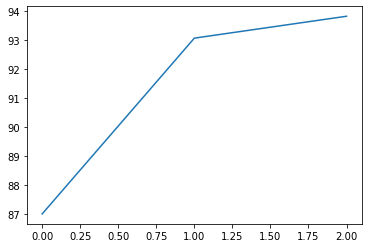

In [27]:
 plt.plot(running_corrects_history)